In [60]:
from modsim_local import *
from modsim_local import State, System



In [69]:
params = Params(y_attach = 80,   # m,
                 v_init = 0,     # m / s,
                 g = 9.8,        # m/s**2,
                 mass = 75,      # kg,
                 area = 1,       # m**2,
                 rho = 1.2,      # kg/m**3,
                 v_term = 60,    # m / s,
                 L = 25,         # m,
                 k = 40,         # N / m
               )

In [70]:
def make_system(params):
    """Makes a System object for the given params.
    
    params: Params object
    
    returns: System object
    """
    area, mass = params.area, params.mass
    g, rho = params.g, params.rho
    v_init, v_term = params.v_init, params.v_term
    y_attach = params.y_attach
    
    C_d = 2 * mass * g / (rho * area * v_term**2)
    init = State(y=y_attach, v=v_init)
    t_end = 20

    return System(params, C_d=C_d, 
                  init=init, t_end=t_end)

In [71]:
system = make_system(params)

In [72]:
def spring_force(y, system):
    """Computes the force of the bungee cord on the jumper:
    
    y: height of the jumper
    
    Uses these variables from system|
    y_attach: height of the attachment point
    L: resting length of the cord
    k: spring constant of the cord
    
    returns: force in N
    """
    y_attach, L, k = system.y_attach, system.L, system.k
    
    distance_fallen = y_attach - y
    if distance_fallen <= L:
        return 0
    
    extension = distance_fallen - L
    f_spring = k * extension
    return f_spring

In [73]:
spring_force(55, system)

0

In [74]:
spring_force(54, system)

40

In [75]:
def drag_force(v, system):
    """Computes drag force in the opposite direction of `v`.
    
    v: velocity
    system: System object

    returns: drag force
    """
    rho, C_d, area = system.rho, system.C_d, system.area
    
    f_drag = -np.sign(v) * rho * v**2 * C_d * area / 2
    return f_drag

In [76]:
v = -60
f_drag = drag_force(v, system)

In [77]:
a_drag = f_drag / system.mass
a_drag

9.8

In [78]:
def slope_func(t, state, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    y, v = state
    mass, g = system.mass, system.g
    
    a_drag = drag_force(v, system) / mass
    a_spring = spring_force(y, system) / mass
    
    dvdt = -g + a_drag + a_spring
    
    return v, dvdt

In [79]:
slope_func(0, system.init, system)

(0, -9.8)

In [80]:
results, details = run_solve_ivp(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

In [81]:
def plot_position(results):
    results.y.plot()
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')

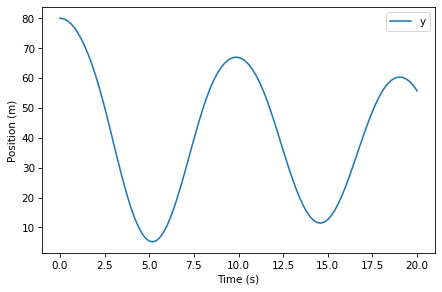

In [82]:
plot_position(results)

In [83]:
min(results.y)

5.179494952371884

In [84]:
a = gradient(results.v)